# Módulo 1: Aprendizado Supervisionado

<div><p>Machine learning é o processo no qual programas aprendem a tomar decisões a partir da análise de dados sem ter alguma programação prévia.</p>

<p><strong>Ex:</strong></p>

<p>Previsão de preços de imóveis a partir da análise de imóveis reais</p>

<p>Classificação taxonômica a partir de critérios anatômicos de seres vivos</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
caminho = "Churn_train.csv"
df = pd.read_csv(caminho, sep = ",", index_col=0)
df = df.dropna()

## Unsupervised Learning

<p>Aprendizado não supervisionado é um tipo de machine learning que busca descobrir padrões a partir de dados não categorizados</p>

<p><strong>Ex:</strong></p>

<p>Classificação e agrupamento de clientes a partir de seus consumos</p>


## Supervised Learning

<p>Aprendizado supervisionado é um tipo de machine learning que busca prever valores já conhecidos. Desta forma, o computador pode testar previsões e ajustar seu modelo. Por meio do aprendizado supervisionado modelos podem ser treinados para prever valores desconhecidos, chamados de target variables, a partir de dados conhecidos, chamados de<em> </em>features.</p>


<p>Target variables também podem ser chamadas de variáveis independentes ou predictor variables. </p>

<p>Do mesmo modo, features podem ser chamadas de variáveis dependentes ou variáveis resposta</p>

## Tipos de Supervised Learning

### Modelo de Classificação

<p>Busca prever <strong>valores categóricos.</strong></p>

<p><strong>Ex:</strong></p>

* Prever inadimplência

<br>

### Modelo de Regressão

<p>Busca prever <strong>valores numéricos</strong> que existem em um contínuo.</p>

<p><strong>Ex:</strong></p>

* Prever o valor de imóveis

<p>Para que modelos de aprendizado supervisionado funcionem é necessário que certos requerimentos sejam correspondidos: não deve haver valores vazios, todos os dados analisados devem ser numéricos, dados devem ser armazenados em Pandas DataFrame ou em Numpy Arrays.</p>

## Variáveis Dummy

<p>Um dos pré -requisitos para construir um modelo de aprendizado supervisionado é que todas suas features sejam valores numéricos. Contudo muitas características importantes para o aprendizado da máquina podem ser variáveis categóricas (gênero, cor, tipo de música, etc.). Por isso é importante converter valores categóricos para números por meio da criação de dummies.</p>

<p>Dummies são valores binários que indicam se um dado corresponde ou não a uma categoria.</p>

<br>

![Alt text](image.png)

In [3]:
df_dummy = pd.get_dummies(df[['Gender', 'Subscription Type', 'Contract Length']])
df = pd.concat([df, df_dummy], axis=1)
df.drop(['Gender', 'Subscription Type', 'Contract Length'], axis=1, inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()
df_scaled = pd.DataFrame(escala.fit_transform(df))
df_scaled.columns = df.columns

### Split

In [5]:
X_non_scaled = df.drop('Churn', axis=1)
y = df['Churn']

X = pd.DataFrame(escala.fit_transform(X_non_scaled))
X.columns = X_non_scaled.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Principais Algoritmos

### k-Vizinhos Mais Próximos (KNN)

<p>O algoritmo KNN é um algoritmo de classificação que busca prever a categoria de dados a partir de seus <strong>k</strong><strong>  </strong>"vizinhos mais próximos". </p>

<p>Vizinhos mais próximos são dados com features similares ao do valor desconhecido. Quanto mais similares as features de dois dados menor a distância entre eles.</p>

<p>Desta forma o algoritmo KNN prevê um dado com base na classificação da maioria de seus vizinhos.</p>

<br>

In [6]:
from sklearn.neighbors import KNeighborsClassifier
    
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))
y_pred_knn = knn.predict(X_test)

0.9598602651785816


### Regressão Linear

<p>Regressão Linear é um algoritmo de regressão que busca prever valores numéricos a partir do cálculo de uma linha.</p>

<p>O algoritmo busca a linha com menor soma residual dos quadrados possível entre as distâncias de pontos à linha. Esses pontos são definidos a partir de variáveis independentes (features) e uma variável dependente(target variable). </p>

<strong>A linha calculada possui formato:</strong>

<p>y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + . . . + a<sub>n</sub>x<sub>n</sub> + b</p>

<p>(a<sub>1</sub>, a<sub>2</sub>, . . . , a<sub>n</sub>, b),b são variáveis que devem ser especificadas</p>

<br>

<p>As previsões são valores pertencentes à linha calculada. Regressões lineares como apenas uma feature são chamadas de regressões simples. Regressão com múltiplas features são chamadas de regressões múltiplas. </p>

<p>A métrica <strong>R<sup>2</sup></strong> ou coeficiente de determinação é comumente utilizada para verificar regressões lineares. A métrica quantifica a variância do valores target em um intervalo de 0 a 1. 1 significa que o modelo explica 100% da variância da variável target e 0 significa 0%.</p>

<p>Outra métrica importante na avaliação de modelos de regressão linear é a <strong>raiz do erro quadrático médio RMSE</strong></p>

<br>

In [8]:
#from sklearn.linear_model import LinearRegression
#reg = LinearRegression
#reg.fit(X_train,y_train)

### Regressão Logística

<p>Regressão Logística, apesar do nome, é um algoritmo de classificação binário que busca prever classes de dados a partir de uma curva de probabilidade.</p>

<p>A partir de uma regressão o algoritmo estipula uma curva de probabilidade para classificar valores binários. Para p &gt; 0,5 o valor é positivo, para p &lt; 0,5 o valor é negativo.</p>

<br>


In [8]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)

### Support Vector Machine (SVM)

<p>SVM é um algoritmo de classificação que busca prever classes de dados a partir da definição de "fronteiras".</p>

<p>O algoritmo atribui a cada dado um vetor de coordenadas iguais a suas variáveis independentes. O algoritmo então busca a fronteira que melhor divide as classes e possui maior separação entre os pontos. </p>

In [9]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

## Overfitting e Underfitting

<p>Um fator importante a ser avaliado em modelos de machine learning é sua complexidade. A complexidade de um modelo é definida por fatores como, tamanho da amostra de treino e parâmetros.</p>

* <p>Modelos muito simples podem ser pouco sensíveis ou incapazes de identificar relações entre os dados. Esse fenômeno é conhecido como <strong>underfitting</strong>.</p>

* <p>Modelos muito complexos podem ser extremamente sensíveis a variações aleatórias no dado tornando-os incapazes de identificar corretamente as relações entre os dados. Esse fenômeno é conhecido como <strong>overfitting</strong>.</p>

<p><strong> </strong></p>

<br>

## Cross Validation

<p>Para a realização de aprendizado supervisionado é primeiro necessário dividir o dataset em um grupo para treino e outro para teste. Contudo ao dividir nosso dataset é possível que nossa amostra possua algum viés que afetará a capacidade do modelo de efetivamente prever resultados.</p>

<p>Para que possíveis falhas como essa não afetem o treinamento de um modelo é comum utilizar-se o método de cross validation.</p>

<p>Cross validation consiste em subdividir o dataset em grupos chamados <strong>folds. </strong>Cada fold é utilizado para dividir o dataset entre teste e treino (splits). Para cada split é gerada uma métrica que pode ser utilizada na análise do modelo. O número de folds é representado pela letra "k". Para cada k-folds serão geradas k métricas, portanto, quanto maior for o número de folds maior será a demanda computacional do processo.</p>

In [10]:
from sklearn.model_selection import cross_val_score, KFold


kf = KFold(n_splits=5, shuffle=True,random_state=42 )
knn_cv_results = cross_val_score(knn, X, y, cv=kf)
print(np.mean(knn_cv_results),np.std(knn_cv_results))

0.9600346624960359 0.00017072313769814551


## Métricas de Avaliação

<p align='center'>
    <img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*wEniP5HewaUSHeIF1_bEiw.png'>

* Alta acurácia indica uma alta taxa de acerto
* Alta precisão indica uma baixa taxa de falsos positivos
* Alto recall indica uma baixa taxa de falsos negativos
* Alto F1 Score indica uma alta precisão e alto recall, particularmente útil em modelos em que ambas as métricas são

### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_knn))

[[37970    93]
 [ 3446 46658]]


### Classification Report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     38063
         1.0       1.00      0.93      0.96     50104

    accuracy                           0.96     88167
   macro avg       0.96      0.96      0.96     88167
weighted avg       0.96      0.96      0.96     88167



### Curva ROC e AUC

<p>A curva de Receiver Operating Characteristic (ROC) é um curva formada a partir da variação de thresholds em modelos de aprendizado supervisionado. </p>

<p>A área abaixo da curva ROC (ROC AUC) é um valor que varia de 0 a 1 em que 1 é o ideal.</p>

<br>

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg )
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

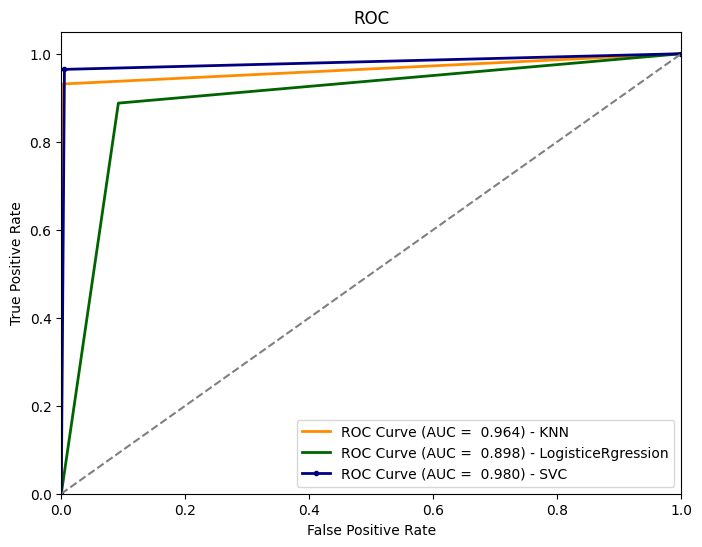

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC =  %0.3f) - KNN' %roc_auc_knn)
plt.plot(fpr_logreg, tpr_logreg, color='darkgreen', lw=2, label=f'ROC Curve (AUC =  %0.3f) - LogisticeRgression' %roc_auc_logreg)
plt.plot(fpr_svc, tpr_svc, color='navy', lw=2, marker='.', label=f'ROC Curve (AUC =  %0.3f) - SVC' %roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

### Ajuste de Hiperparâmetros

<p>Hiperparâmetros são parâmetros definidos antes do treinamento de um modelo. Para cada modelo existem hiperparâmetros ideais que maximizam sua efetividade, desta forma, é muito importante encontrarmos os hiperparâmetros certos para nosso modelo.</p>

<p><strong>Principais hiperparâmetros para:</strong></p>

* <p>Logistic Regression: <strong>C</strong>, <strong>solver</strong></p>

* <p>SVM: <strong>kernels</strong>, <strong>C</strong></p>

* <p>KNN: <strong>n_neighbors</strong></p> 


### Grid Searh Cross Validation

<p>Grid Search CV é um método no qual todas as combinações de variações de hiperparâmetros definidos são avaliadas a praticar de cross-validation. Os hiperparâmetros que retornam a maior média das métricas são escolhidos como melhores</p>

In [11]:
from sklearn.model_selection import GridSearchCV, KFold

params = {
    "n_neighbors" : np.arange(1,20,5),
    "metric" : ["euclidean","manhattan"]
          }

kf = KFold(n_splits=3, shuffle=True,random_state=42 )
knn_cv = GridSearchCV(knn, params, cv=kf)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_ , knn_cv.best_score_)

{'metric': 'euclidean', 'n_neighbors': 1} 0.9547984631307331


### Random Searh Cross Validation

<p>Random Search CV é um método no qual combinações aleatórias de variações de hiperparâmetros definidos são avaliadas a praticar de cross-validation. Os hiperparâmetros que retornam a maior média das métricas são escolhidos como melhores</p>

In [7]:
from sklearn.model_selection import RandomizedSearchCV, KFold

params = {
    "n_neighbors" : np.arange(1,20,5),
    "metric" : ["euclidean","manhattan"]
          }

kf = KFold(n_splits=3, shuffle=True,random_state=42 )
knn_cv = RandomizedSearchCV(knn, params, cv=kf, n_iter = 2)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_ , knn_cv.best_score_)

{'n_neighbors': 11, 'metric': 'manhattan'} 0.9502417308210341
